In [1]:
import pandas as pd
import numpy as np
movies = pd.read_csv('movies.csv')
print movies.shape
print movies.head(10)
print movies.tail()

(27278, 3)
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        Action|Crime|Thriller  
6                               Comedy|Romance  
7                           Adventure|Children

In [160]:
movs = movies.drop(['genres'], axis=1)
movs.head()

movieId                               title
0        1                    Toy Story (1995)
1        2                      Jumanji (1995)
2        3             Grumpier Old Men (1995)
3        4            Waiting to Exhale (1995)
4        5  Father of the Bride Part II (1995)

In [164]:
movs_short = pd.merge( movs,r1, how='inner', on='movieId')
movs_short = movs_short.drop(['rating'], axis=1)
movs_short.head()

movieId                               title
0        1                    Toy Story (1995)
1        2                      Jumanji (1995)
2        3             Grumpier Old Men (1995)
3        4            Waiting to Exhale (1995)
4        5  Father of the Bride Part II (1995)

In [165]:
movs_short.to_csv('movs.csv')

In [2]:
l = movies['genres'].str.split('|')
allgenres = set(sum(l, []))
allgenres
# allgenres = sorted(list(allgenres))
# allgenres

set

In [10]:
allgenres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [3]:
#movies['genres'].str.split('|')
def WhichGenre(movie, genre):
    return genre in movie
WhichGenre(l[0], 'Action')
    

False

In [4]:
l = movies['genres'].str.split('|')
l=pd.DataFrame(l)
l.shape
df = pd.DataFrame(np.zeros([27278, 20], dtype=int), columns=['(no genres listed)','Action','Adventure','Animation','Children','Comedy',
'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller',
'War','Western'])
df.shape
l= pd.concat([l, df], axis=1)
l
#range(len(l))
#for movie in range(len(l)):
# 27278, 1
#for i in allgenres:
#    l[i] = 0
#l
#l.shape
#27278, 21

genres  (no genres listed)  \
0      [Adventure, Animation, Children, Comedy, Fantasy]                   0   
1                         [Adventure, Children, Fantasy]                   0   
2                                      [Comedy, Romance]                   0   
3                               [Comedy, Drama, Romance]                   0   
4                                               [Comedy]                   0   
5                              [Action, Crime, Thriller]                   0   
6                                      [Comedy, Romance]                   0   
7                                  [Adventure, Children]                   0   
8                                               [Action]                   0   
9                          [Action, Adventure, Thriller]                   0   
10                              [Comedy, Drama, Romance]                   0   
11                                      [Comedy, Horror]                   0   
12                      [Adventure, Animation, Children]                   0   
13                                               [Drama]                   0   
14                          [Action, Adventure, Romance]                   0   
15                                        [Crime, Drama]                   0   
16                                      [Drama, Romance]                   0   
17                                              [Comedy]                   0   
18                                              [Comedy]                   0   
19              [Action, Comedy, Crime, Drama, Thriller]                   0   
20                             [Comedy, Crime, Thriller]                   0   
21             [Crime, Drama, Horror, Mystery, Thriller]                   0   
22                             [Action, Crime, Thriller]                   0   
23                                       [Drama, Sci-Fi]                   0   
24                                      [Drama, Romance]                   0   
25                                               [Drama]                   0   
26                                     [Children, Drama]                   0   
27                                      [Drama, Romance]                   0   
28          [Adventure, Drama, Fantasy, Mystery, Sci-Fi]                   0   
29                                        [Crime, Drama]                   0   
...                                                  ...                 ...   
27248                                [Animation, Comedy]                   0   
27249                                  [Comedy, Romance]                   0   
27250                                           [Comedy]                   0   
27251                                           [Comedy]                   0   
27252                                           [Comedy]                   0   
27253                                           [Comedy]                   0   
27254                                           [Comedy]                   0   
27255                                            [Drama]                   0   
27256                                   [Drama, Romance]                   0   
27257                                              [War]                   0   
27258                               [(no genres listed)]                   0   
27259                                            [Drama]                   0   
27260                                           [Sci-Fi]                   0   
27261                               [(no genres listed)]                   0   
27262                         [Drama, Romance, Thriller]                   0   
27263                                            [Drama]                   0   
27264                         [Action, Horror, Thriller]                   0   
27265                                  [Comedy, Romance]                   0   
27266                                           [C

In [5]:
for i in allgenres:
  l[i]=l['genres'].apply(lambda x: WhichGenre(x, i))
l
#l1 = l[allgenres]
#l1

genres (no genres listed)  \
0      [Adventure, Animation, Children, Comedy, Fantasy]              False   
1                         [Adventure, Children, Fantasy]              False   
2                                      [Comedy, Romance]              False   
3                               [Comedy, Drama, Romance]              False   
4                                               [Comedy]              False   
5                              [Action, Crime, Thriller]              False   
6                                      [Comedy, Romance]              False   
7                                  [Adventure, Children]              False   
8                                               [Action]              False   
9                          [Action, Adventure, Thriller]              False   
10                              [Comedy, Drama, Romance]              False   
11                                      [Comedy, Horror]              False   
12                      [Adventure, Animation, Children]              False   
13                                               [Drama]              False   
14                          [Action, Adventure, Romance]              False   
15                                        [Crime, Drama]              False   
16                                      [Drama, Romance]              False   
17                                              [Comedy]              False   
18                                              [Comedy]              False   
19              [Action, Comedy, Crime, Drama, Thriller]              False   
20                             [Comedy, Crime, Thriller]              False   
21             [Crime, Drama, Horror, Mystery, Thriller]              False   
22                             [Action, Crime, Thriller]              False   
23                                       [Drama, Sci-Fi]              False   
24                                      [Drama, Romance]              False   
25                                               [Drama]              False   
26                                     [Children, Drama]              False   
27                                      [Drama, Romance]              False   
28          [Adventure, Drama, Fantasy, Mystery, Sci-Fi]              False   
29                                        [Crime, Drama]              False   
...                                                  ...                ...   
27248                                [Animation, Comedy]              False   
27249                                  [Comedy, Romance]              False   
27250                                           [Comedy]              False   
27251                                           [Comedy]              False   
27252                                           [Comedy]              False   
27253                                           [Comedy]              False   
27254                                           [Comedy]              False   
27255                                            [Drama]              False   
27256                                   [Drama, Romance]              False   
27257                                              [War]              False   
27258                               [(no genres listed)]               True   
27259                                            [Drama]              False   
27260                                           [Sci-Fi]              False   
27261                               [(no genres listed)]               True   
27262                         [Drama, Romance, Thriller]              False   
27263                                            [Drama]              False   
27264                         [Action, Horror, Thriller]              False   
27265                                  [Comedy, Romance]              False   
27266                                           [Comedy]              False   
27267                

In [6]:
# transform columns to 1 and 0 # need to call it using the same type
l[['(no genres listed)','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy',
  'Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']] = l[['(no genres listed)','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy',
  'Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].astype(int)
l 

genres  (no genres listed)  \
0      [Adventure, Animation, Children, Comedy, Fantasy]                   0   
1                         [Adventure, Children, Fantasy]                   0   
2                                      [Comedy, Romance]                   0   
3                               [Comedy, Drama, Romance]                   0   
4                                               [Comedy]                   0   
5                              [Action, Crime, Thriller]                   0   
6                                      [Comedy, Romance]                   0   
7                                  [Adventure, Children]                   0   
8                                               [Action]                   0   
9                          [Action, Adventure, Thriller]                   0   
10                              [Comedy, Drama, Romance]                   0   
11                                      [Comedy, Horror]                   0   
12                      [Adventure, Animation, Children]                   0   
13                                               [Drama]                   0   
14                          [Action, Adventure, Romance]                   0   
15                                        [Crime, Drama]                   0   
16                                      [Drama, Romance]                   0   
17                                              [Comedy]                   0   
18                                              [Comedy]                   0   
19              [Action, Comedy, Crime, Drama, Thriller]                   0   
20                             [Comedy, Crime, Thriller]                   0   
21             [Crime, Drama, Horror, Mystery, Thriller]                   0   
22                             [Action, Crime, Thriller]                   0   
23                                       [Drama, Sci-Fi]                   0   
24                                      [Drama, Romance]                   0   
25                                               [Drama]                   0   
26                                     [Children, Drama]                   0   
27                                      [Drama, Romance]                   0   
28          [Adventure, Drama, Fantasy, Mystery, Sci-Fi]                   0   
29                                        [Crime, Drama]                   0   
...                                                  ...                 ...   
27248                                [Animation, Comedy]                   0   
27249                                  [Comedy, Romance]                   0   
27250                                           [Comedy]                   0   
27251                                           [Comedy]                   0   
27252                                           [Comedy]                   0   
27253                                           [Comedy]                   0   
27254                                           [Comedy]                   0   
27255                                            [Drama]                   0   
27256                                   [Drama, Romance]                   0   
27257                                              [War]                   0   
27258                               [(no genres listed)]                   1   
27259                                            [Drama]                   0   
27260                                           [Sci-Fi]                   0   
27261                               [(no genres listed)]                   1   
27262                         [Drama, Romance, Thriller]                   0   
27263                                            [Drama]                   0   
27264                         [Action, Horror, Thriller]                   0   
27265                                  [Comedy, Romance]                   0   
27266                                           [C

In [213]:
#df = pd.DataFrame(np.random.randn(27278, 20), columns=['(no genres listed)','Action','Adventure','Animation','Children','Comedy',
#'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller',
#'War','Western'])
#df.shape

In [172]:
# Merge the movies data frame and l
movies1 = pd.concat([movies, l], axis=1)
movies1 = pd.DataFrame(movies1 )
movies1.head(4500)
#type(movies1) pandas.core.frame.DataFrame

movieId                                              title  \
0           1                                   Toy Story (1995)   
1           2                                     Jumanji (1995)   
2           3                            Grumpier Old Men (1995)   
3           4                           Waiting to Exhale (1995)   
4           5                 Father of the Bride Part II (1995)   
5           6                                        Heat (1995)   
6           7                                     Sabrina (1995)   
7           8                                Tom and Huck (1995)   
8           9                                Sudden Death (1995)   
9          10                                   GoldenEye (1995)   
10         11                     American President, The (1995)   
11         12                 Dracula: Dead and Loving It (1995)   
12         13                                       Balto (1995)   
13         14                                       Nixon (1995)   
14         15                            Cutthroat Island (1995)   
15         16                                      Casino (1995)   
16         17                       Sense and Sensibility (1995)   
17         18                                  Four Rooms (1995)   
18         19              Ace Ventura: When Nature Calls (1995)   
19         20                                 Money Train (1995)   
20         21                                  Get Shorty (1995)   
21         22                                     Copycat (1995)   
22         23                                   Assassins (1995)   
23         24                                      Powder (1995)   
24         25                           Leaving Las Vegas (1995)   
25         26                                     Othello (1995)   
26         27                                Now and Then (1995)   
27         28                                  Persuasion (1995)   
28         29  City of Lost Children, The (Cité des enfants p...   
29         30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
...       ...                                                ...   
4470     4565                              American Ninja (1985)   
4471     4566         American Ninja 2: The Confrontation (1987)   
4472     4567                American Ninja 3: Blood Hunt (1989)   
4473     4568                            Best of the Best (1989)   
4474     4569                          Best of the Best 2 (1993)   
4475     4570                            Big Picture, The (1989)   
4476     4571            Bill & Ted's Excellent Adventure (1989)   
4477     4572                                  Black Rain (1989)   
4478     4573                                       Blaze (1989)   
4479     4574                                  Blind Fury (1989)   
4480     4575                                 Breaking In (1989)   
4481     4576                  C.H.U.D. II - Bud the Chud (1989)   
4482     4577                           Casualties of War (1989)   
4483     4578                                 Chances Are (1989)   
4484     4579                                      Cookie (1989)   
4485     4580                                      Cyborg (1989)   
4486     4581                                         Dad (1989)   
4487     4582                                   Dead Bang (1989)   
4488     4583                          Disorganized Crime (1989)   
4489     4584                        Dream a Little Dream (1989)   
4490     4585                             Dream Team, The (1989)   
4491     4586                         Dry White Season, A (1989)   
4492     4587                        Earth Girls Are Easy (1988)   
4493     4588     Eddie and the Cruisers II: Eddie Lives! (1989)   
4494     4589                      Eddie and the Cruisers (1983)   
4495     4590                       Enemies: A Love Story (1989)   
4496     4591                             Erik the Viking (198

In [18]:
print movies1[:0]

SyntaxError: invalid syntax (<ipython-input-18-6eb68cfd7c66>, line 1)

In [29]:
# sc
# movies_raw = sc.textFile(movies1)
# movies_raw_data_header = movies_raw_data.take(1)[0]
print movies1.to_csv(sep='\t', index=False, header=False)

1	Toy Story (1995)	Adventure|Animation|Children|Comedy|Fantasy	['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']	0	0	1	1	1	1	0	0	0	1	0	0	0	0	0	0	0	0	0	0
2	Jumanji (1995)	Adventure|Children|Fantasy	['Adventure', 'Children', 'Fantasy']	0	0	1	0	1	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0
3	Grumpier Old Men (1995)	Comedy|Romance	['Comedy', 'Romance']	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	1	0	0	0	0
4	Waiting to Exhale (1995)	Comedy|Drama|Romance	['Comedy', 'Drama', 'Romance']	0	0	0	0	0	1	0	0	1	0	0	0	0	0	0	1	0	0	0	0
5	Father of the Bride Part II (1995)	Comedy	['Comedy']	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0
6	Heat (1995)	Action|Crime|Thriller	['Action', 'Crime', 'Thriller']	0	1	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	1	0	0
7	Sabrina (1995)	Comedy|Romance	['Comedy', 'Romance']	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	1	0	0	0	0
8	Tom and Huck (1995)	Adventure|Children	['Adventure', 'Children']	0	0	1	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
9	Sudden Death (1995)	Action	['Action']	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
10	GoldenE

In [ ]:
type(movies)
type(l[0])
l[0].apply(lambda x: WhichGenre(l[0],'Action'))

In [149]:
import pandas as pd
ratings = pd.read_csv('ratings.csv')
print ratings.head(10)
ratings.tail()

   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580
5       1      112     3.5  1094785740
6       1      151     4.0  1094785734
7       1      223     4.0  1112485573
8       1      253     4.0  1112484940
9       1      260     4.0  1112484826


userId  movieId  rating   timestamp
20000258  138493    68954     4.5  1258126920
20000259  138493    69526     4.5  1259865108
20000260  138493    69644     3.0  1260209457
20000261  138493    70286     5.0  1258126944
20000262  138493    71619     2.5  1255811136

In [68]:
ratings_short = ratings.drop('timestamp', 1)

In [78]:
ratings[ratings.movieId==1]

userId  movieId  rating   timestamp
236            3        1     4.0   944919407
517            6        1     5.0   858275452
817            8        1     4.0   833981871
922           10        1     4.0   943497887
960           11        1     4.5  1230858821
1464          12        1     4.0   859063718
1500          13        1     4.0   849082891
1562          14        1     4.5  1225311239
1854          16        1     3.0   990969772
2061          19        1     5.0   855176628
2302          22        1     3.0   994638157
2435          23        1     4.0   914458411
2537          24        1     4.0   994230149
3534          31        1     3.0  1424733487
3903          34        1     5.0   846509445
4305          39        1     5.0   859325696
4794          47        1     1.0  1239940397
5194          53        1     4.0   938948976
5400          54        1     4.0   974840421
6343          58        1     5.0  1144058408
7000          59        1     4.5  1380400521
7477          66        1     4.0   940421847
7627          69        1     4.0   866811171
8676          80        1     3.0   858458513
8724          82        1     5.0  1317331523
9031          84        1     5.0   832543433
9494          90        1     3.5  1127866527
9621          91        1     4.0  1111531562
10319         93        1     5.0   835037871
10425         96        1     3.5  1366893952
...          ...      ...     ...         ...
19991410  138424        1     5.0   863351563
19991726  138428        1     5.0  1029083968
19991918  138430        1     2.0   849702752
19991952  138431        1     5.0   846350688
19992028  138432        1     4.0   950562547
19992383  138436        1     3.5  1346195850
19992687  138437        1     4.0  1193454078
19993470  138439        1     4.0  1284224655
19993593  138441        1     5.0   940208243
19993776  138443        1     3.5  1231085297
19994065  138445        1     4.0   868182423
19994085  138446        1     5.0  1358982680
19994230  138448        1     5.0   834499794
19994728  138454        1     5.0   993161357
19995149  138456        1     1.0  1183781000
19995893  138459        1     2.0  1248918002
19996364  138464        1     4.0  1024810573
19996670  138467        1     4.0   951845624
19997120  138471        1     4.5  1355632490
19997263  138472        1     3.0  1194039433
19997615  138473        1     4.5  1274233803
19997705  138474        1     5.0   965928844
19998469  138477        1     3.0  1040084810
19998769  138480        1     4.0   855148037
19998790  138481        1     4.0  1112145561
19998860  138483        1     4.0   833831347
19999318  138486        1     5.0  1207075167
19999573  138488        1     3.0   835386791
19999786  138491        1     2.0  1247183316
19999890  138493        1     3.5  1255817134

[49695 rows x 4 columns]

In [ ]:
headerw = ratings[:0]
print ratings.to_csv(sep='\t', index=False, header=False)

In [150]:
#get number of ratings by movie
#obj = ratings.groupby('movieId').agg('count') #gets you the same as tye next two lines
obj = ratings.groupby('movieId')
obj1 = obj.agg({'rating':'count'})
obj1

rating
movieId        
1         49695
2         22243
3         12735
4          2756
5         12161
6         23899
7         12961
8          1415
9          3960
10        29005
11        18162
12         3845
13         1461
14         6022
15         2910
16        17394
17        20667
18         5203
19        20938
20         4084
21        24116
22         9928
23         4250
24         7971
25        21553
26         2755
27         1642
28         3154
29         8520
30         1281
...         ...
131146        1
131148        1
131150        1
131152        1
131154        1
131156        1
131158        2
131160        1
131162        1
131164        1
131166        1
131168        1
131170        1
131172        1
131174        1
131176        1
131180        1
131231        1
131237        1
131239        1
131241        1
131243        1
131248        1
131250        1
131252        1
131254        1
131256        1
131258        1
131260        1
131262        1

[26744 rows x 1 columns]

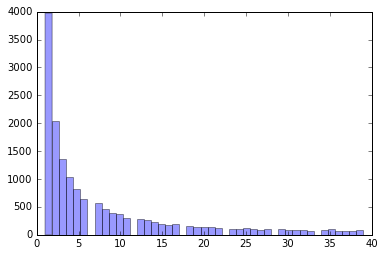

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
rat = obj1.rating
rat1 =rat[rat<40]

d= plt.hist(rat1, alpha=0.4, bins=45)


In [151]:
# eliminate movies with less than 10 ratings
r1 = obj1[obj1['rating'] >4]
r1=r1.reset_index() #makes movieId a column
print r1.head(), r1.shape

   movieId  rating
0        1   49695
1        2   22243
2        3   12735
3        4    2756
4        5   12161 (18345, 2)


In [37]:
type(r1)

pandas.core.frame.DataFrame

In [152]:
#ratings.loc[obj1['rating'] >5,:]
#ratshort = pd.concat( ratings,r1, join='inner', keys='movieId') # this one gives error because ratings and r1 not a list
#ratshort = pd.concat([ratings, r1], axis=1, join='inner')
ratshort = pd.merge( ratings,r1, how='inner', on='movieId')
ratshort
#print ratings.shape, obj1.shape

userId  movieId  rating_x   timestamp  rating_y
0              1        2       3.5  1112486027     22243
1              5        2       3.0   851527569     22243
2             13        2       3.0   849082742     22243
3             29        2       3.0   835562174     22243
4             34        2       3.0   846509384     22243
5             54        2       3.0   974918176     22243
6             88        2       1.0  1098277938     22243
7             91        2       3.5  1112061358     22243
8            116        2       2.0  1132728068     22243
9            119        2       4.0   845110667     22243
10           120        2       1.0   838153425     22243
11           124        2       2.0  1134476330     22243
12           127        2       3.0   847127455     22243
13           128        2       3.0   900720958     22243
14           129        2       3.0  1283448701     22243
15           131        2       1.0  1238326861     22243
16           132        2       3.0  1114172997     22243
17           137        2       3.0   992797771     22243
18           142        2       4.0   833458658     22243
19           152        2       3.0  1161215251     22243
20           156        2       5.0  1040937649     22243
21           158        2       3.0   842734429     22243
22           164        2       3.0   845248397     22243
23           165        2       3.0   835483502     22243
24           170        2       3.0   940253294     22243
25           184        2       3.0   840016743     22243
26           220        2       3.0  1056172947     22243
27           232        2       3.5  1162148886     22243
28           235        2       3.0   939225131     22243
29           238        2       3.0  1111509612     22243
...          ...      ...       ...         ...       ...
19983994  130622    26235       2.0  1290422530         5
19983995  130767    26235       3.5  1290437208         5
19983996  137046    26235       3.0  1358105747         5
19983997   97533    90052       1.5  1359049002         5
19983998  122983    90052       3.0  1374086805         5
19983999  130459    90052       1.5  1379707272         5
19984000  131904    90052       3.0  1317867353         5
19984001  135186    90052       4.0  1350141896         5
19984002  100806    91834       3.0  1392906863         5
19984003  117793    91834       3.0  1375596170         5
19984004  120252    91834       1.5  1324405812         5
19984005  133047    91834       4.0  1419373291         5
19984006  134197    91834       3.0  1365946953         5
19984007  101816    69155       0.5  1268935157         5
19984008  111549    69155       3.5  1268843220         5
19984009  117054    69155       1.5  1383950535         5
19984010  118205    69155       3.0  1248903104         5
19984011  131904    69155       3.5  1249439444         5
19984012  106441    88674       3.0  1313027750         7
19984013  112365    88674       2.0  1324848240         7
19984014  114406    88674       1.0  1312537262         7
19984015  123297    88674       5.0  1318099213         7
19984016  130622    88674       2.5  1312441597         7
19984017  134567    88674       0.5  1312955472         7
19984018  135399    88674       5.0  1335796124         7
19984019  111088    71755       5.0  1367001970         5
19984020  114579    71755       4.5  1372493724         5
19984021  130767    71755       2.5  1255739935         5
19984022  131651    71755       2.5  1289414829         5
19984023  138325    71755       4.5  1285360611         5

[19984024 rows x 5 columns]

In [153]:
# eliminate users with less than 20 ratings?
check = ratshort.groupby('userId').agg('count') 

s=check.sort_values(by='movieId', ascending=True, axis=0) #after eliminating movies fewer than 5 ratings, 17 users out
# of a total of 138493 have fewer than 20 ratings : 29 have 19 ratings, 7 have 18, 5 has 17, 2 has 16. I decide to leave them in 
# since they form a very small proportion and eliminating them mightcause some of the movies to have fewer than 5 
# ratings. minimum 5 ratings: 15 have 19, one 17, one 16
s
#s[s.movieId ==18].shape

movieId  rating_x  timestamp  rating_y
userId                                        
47700        16        16         16        16
136626       17        17         17        17
68435        19        19         19        19
75471        19        19         19        19
56882        19        19         19        19
60406        19        19         19        19
89621        19        19         19        19
61524        19        19         19        19
32688        19        19         19        19
111659       19        19         19        19
83479        19        19         19        19
89471        19        19         19        19
136748       19        19         19        19
117009       19        19         19        19
72450        19        19         19        19
39833        19        19         19        19
11415        19        19         19        19
131989       20        20         20        20
69685        20        20         20        20
7408         20        20         20        20
132007       20        20         20        20
70020        20        20         20        20
35159        20        20         20        20
34920        20        20         20        20
70002        20        20         20        20
69716        20        20         20        20
131962       20        20         20        20
125588       20        20         20        20
132001       20        20         20        20
131966       20        20         20        20
...         ...       ...        ...       ...
92269      3495      3495       3495      3495
51703      3530      3530       3530      3530
111549     3596      3596       3596      3596
18138      3643      3643       3643      3643
125978     3659      3659       3659      3659
130459     3681      3681       3681      3681
31122      3704      3704       3704      3704
18611      3731      3731       3731      3731
63147      3781      3781       3781      3781
9544       3795      3795       3795      3795
120575     3803      3803       3803      3803
88820      4059      4059       4059      4059
46470      4082      4082       4082      4082
20132      4100      4100       4100      4100
71975      4180      4180       4180      4180
92011      4236      4236       4236      4236
15617      4273      4273       4273      4273
8963       4446      4446       4446      4446
130767     4610      4610       4610      4610
79159      4675      4675       4675      4675
59477      4746      4746       4746      4746
131904     4878      4878       4878      4878
83090      5168      5168       5168      5168
34576      5319      5319       5319      5319
74142      5380      5380       5380      5380
121535     5391      5391       5391      5391
125794     5445      5445       5445      5445
82418      5620      5620       5620      5620
8405       7500      7500       7500      7500
118205     8540      8540       8540      8540

[138493 rows x 4 columns]

In [154]:
ratshort.shape #(19984024, 5) 19984024 19964833
ratshort = ratshort.drop(['timestamp', 'rating_y'], axis=1)
ratshort


userId  movieId  rating_x
0              1        2       3.5
1              5        2       3.0
2             13        2       3.0
3             29        2       3.0
4             34        2       3.0
5             54        2       3.0
6             88        2       1.0
7             91        2       3.5
8            116        2       2.0
9            119        2       4.0
10           120        2       1.0
11           124        2       2.0
12           127        2       3.0
13           128        2       3.0
14           129        2       3.0
15           131        2       1.0
16           132        2       3.0
17           137        2       3.0
18           142        2       4.0
19           152        2       3.0
20           156        2       5.0
21           158        2       3.0
22           164        2       3.0
23           165        2       3.0
24           170        2       3.0
25           184        2       3.0
26           220        2       3.0
27           232        2       3.5
28           235        2       3.0
29           238        2       3.0
...          ...      ...       ...
19983994  130622    26235       2.0
19983995  130767    26235       3.5
19983996  137046    26235       3.0
19983997   97533    90052       1.5
19983998  122983    90052       3.0
19983999  130459    90052       1.5
19984000  131904    90052       3.0
19984001  135186    90052       4.0
19984002  100806    91834       3.0
19984003  117793    91834       3.0
19984004  120252    91834       1.5
19984005  133047    91834       4.0
19984006  134197    91834       3.0
19984007  101816    69155       0.5
19984008  111549    69155       3.5
19984009  117054    69155       1.5
19984010  118205    69155       3.0
19984011  131904    69155       3.5
19984012  106441    88674       3.0
19984013  112365    88674       2.0
19984014  114406    88674       1.0
19984015  123297    88674       5.0
19984016  130622    88674       2.5
19984017  134567    88674       0.5
19984018  135399    88674       5.0
19984019  111088    71755       5.0
19984020  114579    71755       4.5
19984021  130767    71755       2.5
19984022  131651    71755       2.5
19984023  138325    71755       4.5

[19984024 rows x 3 columns]

In [146]:
# skip
import random
random.seed(0)
#ratsmall = ratshort.sample(frac=0.8)
#ratsmall.shape(15971866, 3)
ratsmalla = ratshort.sample(frac=0.6)
ratsmalla.shape

(11978900, 3)

In [147]:
ratsmalla.to_csv('ratsmalla.csv')

In [145]:
ratsmall.to_csv('ratsmall.csv')

In [155]:
ratshort.to_csv('rats.csv')

In [137]:
#s[s.movieId ==18].shape
s[s.movieId==43].shape

(1163, 4)

In [47]:
ratings.shape


(20000263, 4)

In [148]:
sc

''

In [18]:
import pandas as pd
tags = pd.read_csv('tags.csv')
print tags.head(10)
tags.tail()

   userId  movieId               tag   timestamp
0      18     4141       Mark Waters  1240597180
1      65      208         dark hero  1368150078
2      65      353         dark hero  1368150079
3      65      521     noir thriller  1368149983
4      65      592         dark hero  1368150078
5      65      668         bollywood  1368149876
6      65      898  screwball comedy  1368150160
7      65     1248     noir thriller  1368149983
8      65     1391              mars  1368150055
9      65     1617          neo-noir  1368150217


userId  movieId            tag   timestamp
465559  138446    55999        dragged  1358983772
465560  138446    55999  Jason Bateman  1358983778
465561  138446    55999         quirky  1358983778
465562  138446    55999            sad  1358983772
465563  138472      923  rise to power  1194037967

In [19]:
import pandas as pd
gtags = pd.read_csv('genome-tags.csv')
print gtags.head(10)
gtags.tail()

   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s
5      6         1950s
6      7         1960s
7      8         1970s
8      9         1980s
9     10  19th century


tagId      tag
1123   1124  writing
1124   1125    wuxia
1125   1126     wwii
1126   1127   zombie
1127   1128  zombies

In [23]:
import pandas as pd
gscores = pd.read_csv('genome-scores.csv')
print gscores.head()
gscores.tail()

   movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675


movieId  tagId  relevance
11709763   131170   1124    0.58775
11709764   131170   1125    0.01075
11709765   131170   1126    0.01575
11709766   131170   1127    0.11450
11709767   131170   1128    0.02175

In [224]:
#concatenate gtags and gscores
A = pd.merge(gtags, gscores, on='tagId', how='outer')

In [12]:
mr = pd.merge(movies1, ratings, on='movieId', how='outer')
mr.shape
mr.head()
mr.to_csv('mr.csv')

In [13]:
!head mr.csv

,movieId,title,genres,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']",0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.0,4.0,944919407.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']",0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6.0,5.0,858275452.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']",0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8.0,4.0,833981871.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']",0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10.0,4.0,943497887.0
4,1,Toy Story (1995),Adventure

In [ ]:
ta = pd.merge(tags, A, on='movieId', how='outer')
ta.head()

In [232]:
print movies1.head(), ratings.head(), tags.head(), A.head()

    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                              genres  (no genres listed)  \
0  [Adventure, Animation, Children, Comedy, Fantasy]                 0.0   
1                     [Adventure, Children, Fantasy]                 0.0   
2                                  [Comedy, Romance]                 0.0   
3                           [Comedy, Drama, Romance]                 0.0   
4                

In [81]:
import pandas as pd
links = pd.read_csv('links.csv')
links[['tmdbId']]= links['tmdbId'].apply(lambda x: int(x) if not pd.isnull(x) else -9999)
print links.head()
links.tail()


   movieId  imdbId  tmdbId
0        1  114709     862
1        2  113497    8844
2        3  113228   15602
3        4  114885   31357
4        5  113041   11862


movieId   imdbId  tmdbId
27273   131254   466713    4436
27274   131256   277703    9274
27275   131258  3485166  285213
27276   131260   249110   32099
27277   131262  1724965  286971

In [73]:
#links['tmdbId'].apply(str)
#links['tmdbId'].isnull().values.any()
#links[['tmdbId']].apply(lambda x: int(x) if(np.all(pd.notnull(x[1]))) else x, axis = 1)
#links['tmdbId'].apply(lambda x: int(x) if x != np.isnan else x)
#type(links[['tmdbId']])
#y.fillna(-99999).astype(int)
#w=z.astype(str)
#w[5]  this one is teh -99999 one
#w[5]=np.nan 
#x

In [ ]:
full = pd.concat([movies, ratings, tags], axis=1, join_axes=[movies[tn.index])


In [ ]:
Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy

In [161]:
list_dict = [{'Adventure':1, 'Animation':1, 'Children':1}, {'Children':1, 'Fantasy':1}]

In [162]:
list_dict

[{'Adventure': 1, 'Animation': 1, 'Children': 1},
 {'Children': 1, 'Fantasy': 1}]

In [164]:
genre_pd = pd.DataFrame(list_dict)

In [165]:
genre_pd.columns

Index([u'Adventure', u'Animation', u'Children', u'Fantasy'], dtype='object')